# 이상치 정제

## #01. 준비과정

### [1] 패키지 참조

In [1]:
from pandas import read_excel, DataFrame
from sklearn.impute import SimpleImputer
import numpy as np

### [2] 데이터 가져오기

In [16]:
origin = read_excel('C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/06.데이터정제\수업\데이터자료/ref_sample2.xlsx', index_col='name')
origin

,kor,eng,math,sic
name,,,,
철수,98.0,77,88.0,64.0
영희,88.0,120,62.0,72.0
민철,NaN,70,83.0,79.0
수현,63.0,60,31.0,71.0
호영,75.0,50,90.0,NaN
영호,80.0,88,91.0,72.0
용식,82.0,88,NaN,90.0
나영,90.0,92,81.0,NaN
석영,91.0,90,89.0,80.0


## #02. 결측치 정제하기

In [3]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imr = imr.fit_transform(origin.values)
re_df = DataFrame(df_imr, index=origin.index, columns=origin.columns)
re_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,120.0,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


## #03. 이상치가 존재하는 변수 찾기

### [1] 상자그림 확인

<Axes: >

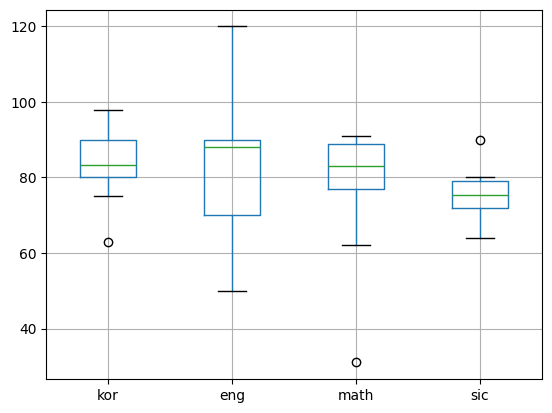

In [4]:
re_df.boxplot()

### [2] 찾아낸 이상치 판별

## #04. 분석가의 주관에 따른 이상치 판별

### [1] 이상치를 결측치로 변경

In [8]:
re_df.loc[re_df['eng'] > 100, 'eng'] = np.nan
re_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,NaN,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


### [2] 변경된 결측치에 대한 처리

In [17]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imr = imr.fit_transform(re_df.values)
outline_df = DataFrame(df_imr,index=re_df.index,columns=re_df.columns)
outline_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,63.000,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


## #05. 극단치 경계값을 계산하여 이상치 찾기

### [1] 사분위수의 이해

### [2] 사분위 수의 종류

### [3] 수식을 활용하여 사분위수 구하기

#### (1) 국어점수에 대한 1사분위 수

##### 1사분위 수의 index


In [26]:
freq = len(outline_df['kor'])
Q1 = int((freq-1)*0.25)+1
Q1

1

##### 실제 1사분위수 데이터

In [28]:
outline_df['kor'].sort_values().values[Q1]

75.0

#### (2) 국어점수에 대한 2사분위 수

##### 쉬운 접근 방법

$Q_2 = ((총도수 + 1) * 0.5) - 1$

In [30]:
freq = len(outline_df['kor'])
Q2 = int((freq+1)*0.5)-1
outline_df['kor'].sort_values().values[Q2]

83.375

##### 통계학에서 제시하는 수식

In [31]:
freq = len(outline_df['kor'])
v = outline_df['kor'].sort_values().values
v

array([63.   , 75.   , 80.   , 82.   , 83.375, 88.   , 90.   , 91.   ,
       98.   ])

In [32]:
if freq % 2 == 0:
    print((v[freq//2]+v[(freq)//2+1])/2)
else:
    print(v[(freq)//2])

83.375


#### (3) 국어점수에 대한 3사분위 수

$Q_3 = ((총도수 + 1) * 0.75) - 1$

In [33]:
freq = len(outline_df['kor'])
Q3 = int((freq+1)*0.75)-1
outline_df['kor'].sort_values().values[Q3]


90.0

### [4] 파이썬 기능을 활용한 사분위수 구하기

In [34]:
print("Q1:", outline_df['kor'].quantile(0.25))
print("Q2:", outline_df['kor'].quantile(0.5))
print("Q2:", outline_df['kor'].median())
print("Q3:", outline_df['kor'].quantile(0.75))

Q1: 80.0
Q2: 83.375
Q2: 83.375
Q3: 90.0


### [5] 사분위간 범위

$iqr = Q_3 - Q_1$

In [35]:
Q1 = outline_df['kor'].quantile(0.25)
Q3 = outline_df['kor'].quantile(0.75)
iqr = Q3 - Q1
print('사분위간 범위:', iqr)

사분위간 범위: 10.0


### [6] 극단치 경계

In [36]:
outline_max = Q3+1.5*iqr
outline_min = Q1-1.5*iqr
print('상한 극단치 경계:', outline_max)
print('하한 극단치 경계:', outline_min)

상한 극단치 경계: 105.0
하한 극단치 경계: 65.0


### [7] 극단치 경계값을 활용한 이상치 찾기

#### 하한 이상치 확인

원하는 행을 검색하기 위해 표현식을 사용한 경우

In [37]:
outline_df.loc[outline_df['kor'] <= outline_min]

,kor,eng,math,sic
name,,,,
수현,63.0,60.0,31.0,71.0


In [39]:
outline_df.loc[outline_df['kor'] <= outline_min,'kor']

name
수현    63.0
Name: kor, dtype: float64

#### 하한 이상치를 결측치로 변환

In [40]:
outline_df.loc[outline_df['kor'] <= outline_min,'kor'] = np.nan
outline_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


#### 상한 이상치를 검색하여 결측치로 변환

원하는 행을 검색하기 위해 `query()` 메서드를 사용한 경우

In [41]:
outline_df.query('kor>@outline_max')['kor'] = np.nan
outline_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


### [8] 지금까지의 과정을 일괄 처리하기

#### (1) 영어 점수에 대한 처리

> 상자그림에서 확인했을 때 영어 점수에는 이상치가 없었으므로 아래의 코드로 영어점수에 결측치가 추가되는 않는다.

In [42]:
Q1 = outline_df['eng'].quantile(0.25)
Q3 = outline_df['eng'].quantile(0.75)
iqr = Q3 - Q1

outline_max = Q3+1.5*iqr
outline_min = Q1-1.5*iqr

outline_df.loc[outline_df['eng'] <= outline_min,'eng'] = np.nan
outline_df.loc[outline_df['eng'] >= outline_max,'eng'] = np.nan
outline_df


,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


#### (2) 수학 점수에 대한 처리

In [43]:
Q1 = outline_df['math'].quantile(0.25)
Q3 = outline_df['math'].quantile(0.75)
iqr = Q3 - Q1

outline_max = Q3+1.5*iqr
outline_min = Q1-1.5*iqr

outline_df.loc[outline_df['math'] <= outline_min,'math'] = np.nan
outline_df.loc[outline_df['math'] >= outline_max,'math'] = np.nan
outline_df


,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,NaN,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


#### (3) 과학점수에 대한 처리

In [44]:
Q1 = outline_df['sic'].quantile(0.25)
Q3 = outline_df['sic'].quantile(0.75)
iqr = Q3 - Q1

outline_max = Q3+1.5*iqr
outline_min = Q1-1.5*iqr

outline_df.loc[outline_df['sic'] <= outline_min,'sic'] = np.nan
outline_df.loc[outline_df['sic'] >= outline_max,'sic'] = np.nan
outline_df


,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,NaN,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,NaN
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


### [9] 결측치로 변환된 값을 처리

In [45]:
imr = SimpleImputer(missing_values=np.nan,strategy='mean')
df_imr = imr.fit_transform(outline_df.values)
final_df = DataFrame(df_imr, index=outline_df.index, columns=outline_df.columns)
final_df

,kor,eng,math,sic
name,,,,
철수,98.000000,77.000,88.000000,64.000000
영희,88.000000,76.875,62.000000,72.000000
민철,83.375000,70.000,83.000000,79.000000
수현,85.921875,60.000,82.609375,71.000000
호영,75.000000,50.000,90.000000,75.428571
영호,80.000000,88.000,91.000000,72.000000
용식,82.000000,88.000,76.875000,73.607143
나영,90.000000,92.000,81.000000,75.428571
석영,91.000000,90.000,89.000000,80.000000
